## 1- import libraries | Get dataset

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv("/content/Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## 2- Data Overview & Quality Check


In [49]:
df.head(20)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [103]:
df.tail(20)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_group,route
300133,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.17,49,51457,Very Long,Chennai - Hyderabad
300134,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,19.92,49,51457,Very Long,Chennai - Hyderabad
300135,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.75,49,51457,Very Long,Chennai - Hyderabad
300136,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.58,49,51457,Very Long,Chennai - Hyderabad
300137,Vistara,UK-838,Chennai,Night,one,Night,Hyderabad,Business,25.83,49,51457,Very Long,Chennai - Hyderabad
300138,Vistara,UK-832,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.33,49,51457,Very Long,Chennai - Hyderabad
300139,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,26.42,49,51457,Very Long,Chennai - Hyderabad
300140,Air_India,AI-539,Chennai,Evening,one,Night,Hyderabad,Business,6.58,49,51345,Short,Chennai - Hyderabad
300141,Air_India,AI-430,Chennai,Morning,one,Night,Hyderabad,Business,13.67,49,51345,Long,Chennai - Hyderabad
300142,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,16.00,49,51345,Long,Chennai - Hyderabad


##3- processing data


In [51]:
df.drop(columns='Unnamed: 0' ,inplace=True)

 Data Exploration

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [53]:
df.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


In [54]:
df.shape

(300153, 11)

In [55]:
df.columns.to_list()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [56]:
for column in df.columns:
  if df[column].dtype =='object':
    print(str(column)+ ' is '+str(df[column].unique()))
    print(df[column].value_counts())
    print('******************************************************')

airline is ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
******************************************************
flight is ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64
******************************************************
source_city is ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
******************************************************
departure_time is ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'La

In [57]:
df.describe(include='O' ).T


,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [59]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [60]:
for i in df.select_dtypes(include='O').columns:
    print(df[i].value_counts())
    print()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

destination

In [61]:
for i in df.select_dtypes(include='O').columns:
    print(df[i].value_counts(normalize=True)*100)
    print()

airline
Vistara      42.597942
Air_India    26.950255
Indigo       14.366007
GO_FIRST      7.720396
AirAsia       5.363265
SpiceJet      3.002136
Name: proportion, dtype: float64

flight
UK-706     1.077784
UK-772     0.913201
UK-720     0.882883
UK-836     0.846901
UK-822     0.822247
             ...   
6E-2914    0.000333
G8-107     0.000333
SG-9974    0.000333
6E-865     0.000333
SG-8339    0.000333
Name: proportion, Length: 1561, dtype: float64

source_city
Delhi        20.437244
Mumbai       20.288320
Bangalore    17.344821
Kolkata      15.441125
Hyderabad    13.595067
Chennai      12.893424
Name: proportion, dtype: float64

departure_time
Morning          23.703245
Early_Morning    22.251985
Evening          21.689605
Night            15.996842
Afternoon        15.923212
Late_Night        0.435111
Name: proportion, dtype: float64

stops
one            83.578375
zero           11.995216
two_or_more     4.426409
Name: proportion, dtype: float64

arrival_time
Night            30.49

In [62]:
for i in df.select_dtypes(exclude='O').columns:
    print(df[i].value_counts(normalize=True)*100)
    print()

duration
2.17     1.413279
2.25     1.344648
2.75     0.959177
2.08     0.917865
2.83     0.773939
           ...   
47.08    0.000333
41.58    0.000333
37.17    0.000333
44.50    0.000333
41.50    0.000333
Name: proportion, Length: 476, dtype: float64

days_left
25    2.209873
18    2.199545
39    2.196546
32    2.193881
26    2.189883
24    2.179555
19    2.177889
31    2.176890
33    2.176223
40    2.175890
41    2.173891
28    2.172892
38    2.169560
20    2.166229
30    2.165895
42    2.164563
22    2.163563
36    2.162231
21    2.158566
37    2.157566
43    2.156234
44    2.144240
17    2.138576
11    2.137910
34    2.136244
13    2.133579
23    2.132579
29    2.131246
12    2.125916
27    2.118919
14    2.115255
15    2.112256
45    2.103594
35    2.095931
16    2.089601
46    2.052287
49    2.050288
48    2.024967
47    2.021969
10    1.939677
8     1.921353
6     1.912358
7     1.900031
9     1.887371
5     1.796417
4     1.691471
3     1.415278
2     1.341316
1     0.642006
N

In [63]:
df.isna().values.any()

np.False_

In [64]:
df.duplicated().sum()

np.int64(0)

<Axes: >

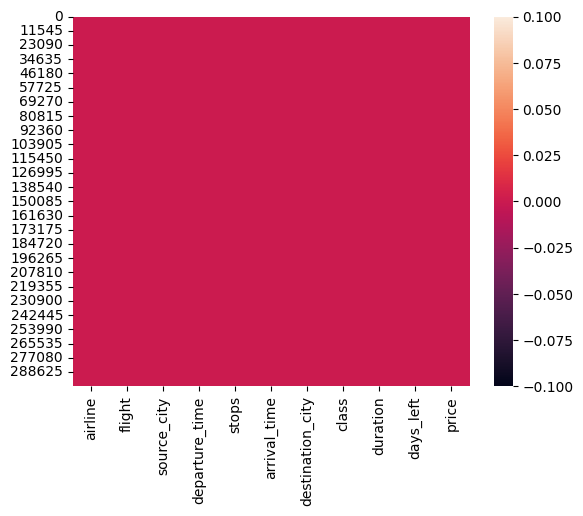

In [65]:
sns.heatmap(df.isnull())

Insights:


Dataset includes pricing, airline, class, route, stops, and time-related features.

Price distribution shows large variability → opportunity for price optimization.

Revenue Actions:

High price variability supports dynamic pricing strategies instead of fixed pricing.

# Price Distribution Analysis

In [66]:
corr_data=df.select_dtypes(include='number').corr()

<Axes: >

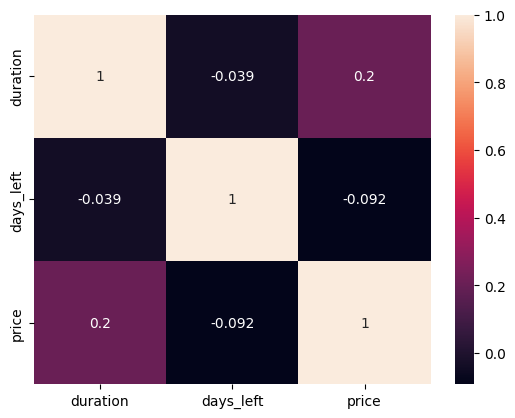

In [67]:
sns.heatmap(corr_data,annot=True)

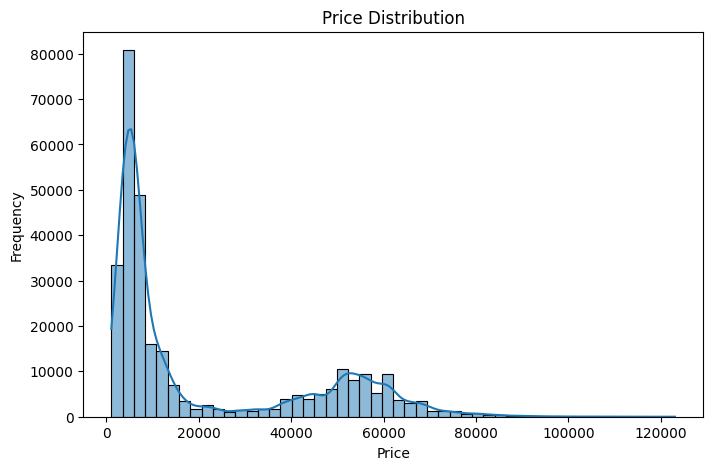

In [68]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


Insights:



Distribution is right-skewed.

Majority of tickets are low–mid price, while few very expensive tickets drive revenue.

Revenue Actions:


Protect high-end prices (Business, Premium routes).

Use Economy volume to upsell higher classes

In [69]:
df[['price']].agg(['min', 'mean', 'max'])


,price
min,1105.000000
mean,20889.660523
max,123071.000000


#### 1.check outlier

In [70]:
df["price"].describe()
outlier=df["price"]
print(outlier)

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64


In [71]:
fig=px.box(df,y=outlier)
fig.show()

<Axes: xlabel='price', ylabel='Count'>

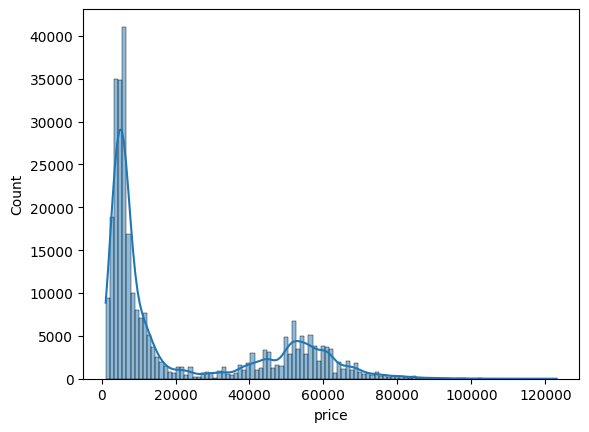

In [72]:
sns.histplot(data=df['price'] ,kde=True)

Insights:


Huge gap between Min and Max price.

Average price is much closer to Min than Max.

Revenue Actions:

Increase Average Ticket Price through bundles and upgrades instead of discounts.

## Understad Class

In [73]:
df["class"]

,class
0,Economy
1,Economy
2,Economy
3,Economy
4,Economy
...,...
300148,Business
300149,Business
300150,Business
300151,Business


In [74]:
df["class"].describe()

,class
count,300153
unique,2
top,Economy
freq,206666


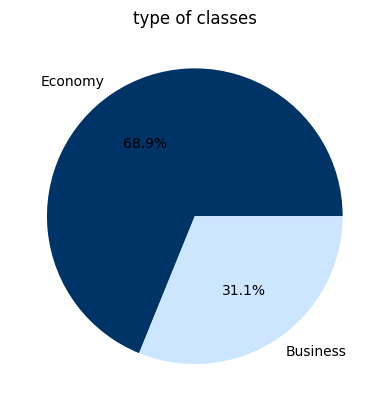

In [75]:
plt.title('type of classes')
type_class = df['class'].value_counts()

plt.pie(type_class, labels=type_class.index, autopct='%1.1f%%', colors = ["#003366","#cce6ff"])

plt.show()

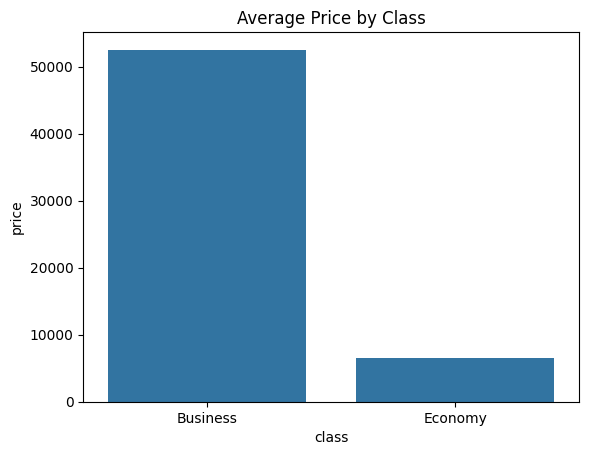

In [91]:
avg_price_class = df.groupby('class')['price'].mean().reset_index()

sns.barplot(data=avg_price_class, x='class', y='price')
plt.title("Average Price by Class")
plt.show()


Insights:

Business class price is significantly higher than Economy.

Revenue is class-driven, not volume-driven.




 Revenue Actions:

Expand Business Class capacity on high-demand routes.

Introduce “Business Lite” offerings

## airline_analysis

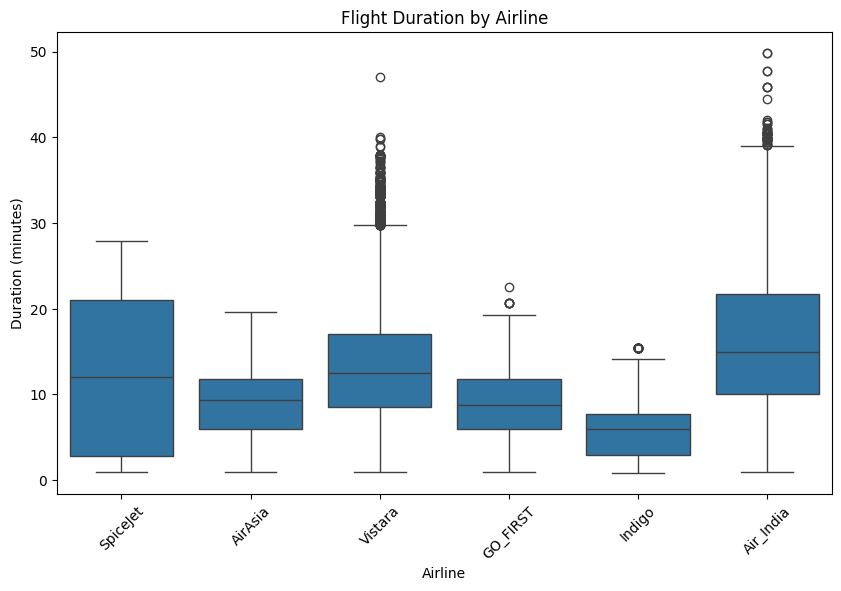

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="airline", y="duration")
plt.xticks(rotation=45)
plt.title("Flight Duration by Airline")
plt.ylabel("Duration (minutes)")
plt.xlabel("Airline")
plt.show()

In [88]:


df['duration_group'] = pd.qcut(df['duration'], q=4, labels=["Short","Medium","Long","Very Long"])

avg_price_duration = df.groupby(['airline','duration_group'])['price'].mean().reset_index()

fig = px.bar(
    avg_price_duration,
    x='airline',
    y='price',
    color='duration_group',
    barmode='group',
    text='price',
    hover_data={'price': True, 'airline': True, 'duration_group': True},
    labels={'price':'Average Price', 'airline':'Airline', 'duration_group':'Duration Group'},
    title="Average Ticket Price per Airline by Duration Group"
)

fig.update_traces(
    texttemplate='%{text:.2f}',
    textposition='outside'
)

fig.update_layout(
    yaxis_title='Average Price',
    xaxis_title='Airline',
    legend_title='Duration Group'
)

fig.show()


Insights:

Vistara clearly positioned as a premium airline.

Budget airlines compete mainly on price

Revenue Actions:

Maintain premium pricing for strong brands.

Avoid price wars; focus on value-added services

In [93]:
airline_share = df['airline'].value_counts().reset_index()
airline_share.columns = ['airline', 'flights']

px.pie(
    airline_share,
    names='airline',
    values='flights',
    title="Market Share by Airline"
)


Insights

One airline dominates the market.

Business class competition is weak

Revenue Actions

Leverage dominance to increase prices during peak demand.

Secure corporate contracts.

In [95]:
avg_price_time = (
    df.groupby('departure_time')['price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

px.bar(
    avg_price_time,
    x='departure_time',
    y='price',
    title="Average Price by Departure Time"
)


Insights

Morning & Evening flights are the most expensive.

Late-night flights are cheapest

Revenue Actions

Increase prices in Morning/Evening slots.

Use Late Night for demand stimulation offers

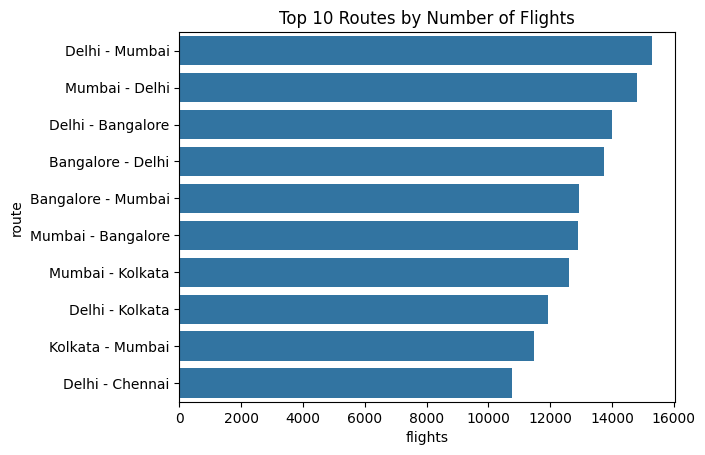

In [96]:
df['route'] = df['source_city'] + " - " + df['destination_city']

top_routes = df['route'].value_counts().head(10).reset_index()
top_routes.columns = ['route', 'flights']

sns.barplot(data=top_routes, y='route', x='flights')
plt.title("Top 10 Routes by Number of Flights")
plt.show()


Insights:

Metro-to-metro routes dominate flight volume.

Indicates strong business travel demand

Revenue Actions:

Premium pricing for business corridors.

Increase frequency during peak business hours

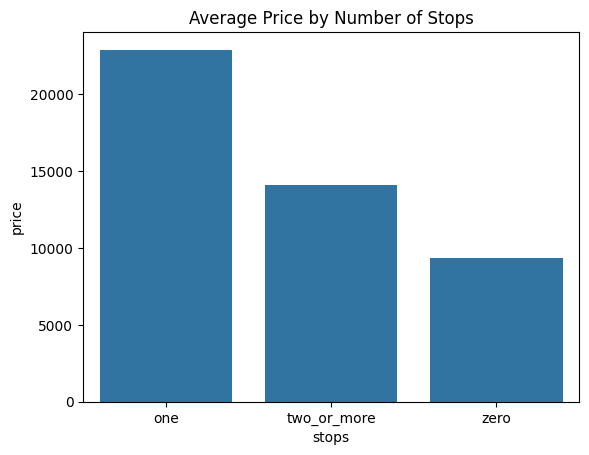

In [97]:
avg_price_stops = (
    df.groupby('stops')['price']
    .mean()
    .reset_index()
)

sns.barplot(data=avg_price_stops, x='stops', y='price')
plt.title("Average Price by Number of Stops")
plt.show()


Insights:

Non-stop flights are significantly more expensive.

Stops are a major pricing factor.

Revenue Actions:

Position Non-stop as a premium option.

Market 1-stop flights as “Best Value.

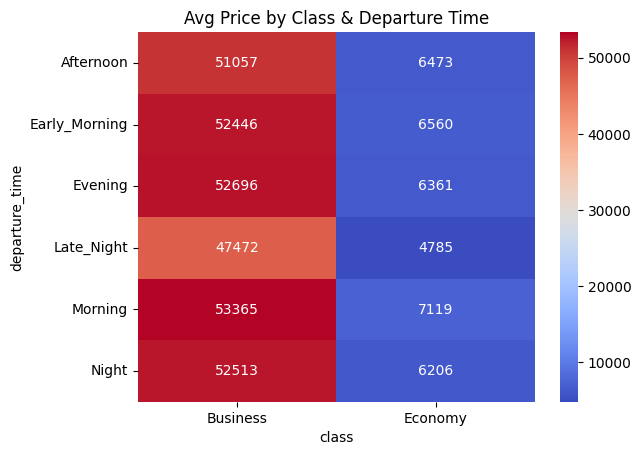

In [98]:
pivot_table = pd.pivot_table(
    df,
    values='price',
    index='departure_time',
    columns='class',
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Avg Price by Class & Departure Time")
plt.show()


Insights:

Business + Morning/Evening = highest prices.

Economy prices are less sensitive to time.

Revenue Actions

Target business travelers with time-based pricing.

Optimize seat allocation by time slot.

## understad cities

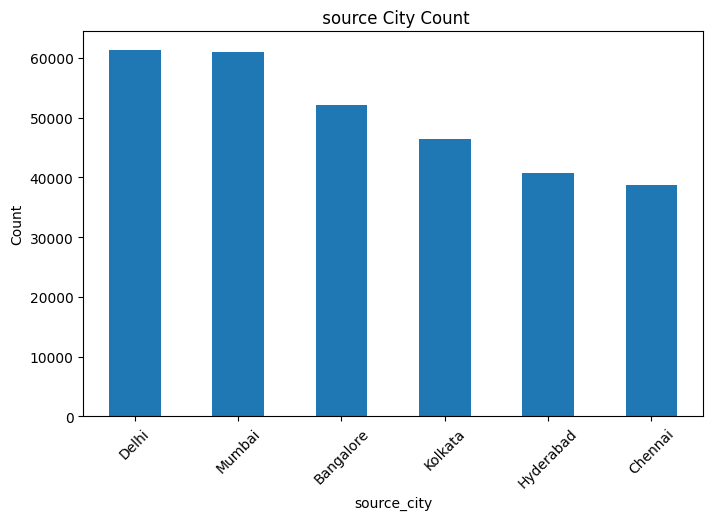

In [76]:
city_counts = df['source_city'].value_counts()
plt.figure(figsize=(8,5))
city_counts.plot(kind='bar')
plt.title(" source City Count")
plt.xlabel("source_city")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

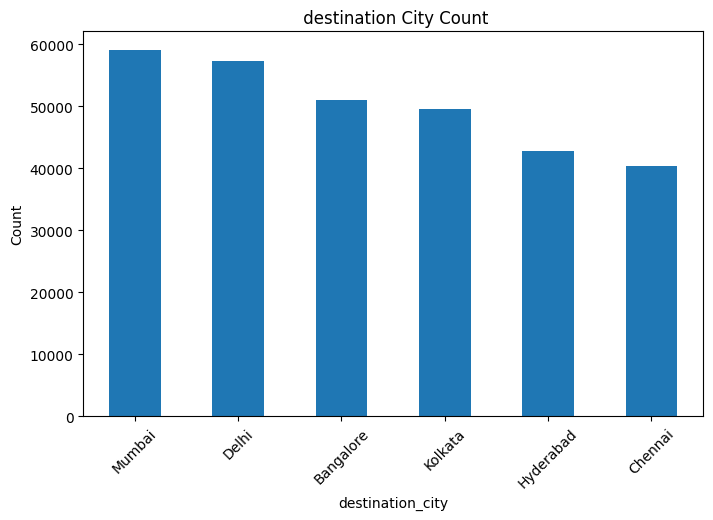

In [77]:
city_counts = df['destination_city'].value_counts()
plt.figure(figsize=(8,5))
city_counts.plot(kind='bar')
plt.title(" destination City Count")
plt.xlabel("destination_city")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


 #### Which city has the highest number of flights departing from it?


In [78]:

counts = df.groupby(['source_city', 'destination_city']).size().reset_index(name='count')

fig = px.bar(
    counts,
    x="source_city",
    y="count",
    color="destination_city",
    barmode="group",
    title="Source City vs Destination City (Interactive)",
    hover_data=["source_city", "destination_city", "count"]
)

fig.update_layout(
    xaxis_title="Source City",
    yaxis_title="Number of Flights",
    legend_title="Destination City",
    bargap=0.17
)

fig.show()


## price analysing

In [79]:
def price_violin_hist(df):

    data = {
        "Category": [],
        "Value": [],
        "Average Price": []
    }

    groups = {
        "airline": "Average Price by Airline",
        "class": "Average Price by Class",
        "source_city": "Average Price by Source City",
        "destination_city": "Average Price by Destination City"
    }

    for col, title in groups.items():
        avg_prices = df.groupby(col)["price"].mean().round(2)
        for value, avg in avg_prices.items():
            data["Category"].append(col)
            data["Value"].append(value)
            data["Average Price"].append(avg)


    plt.figure(figsize=(10,5))
    sns.histplot(df["price"], kde=True, bins=30)
    plt.title("Price Histogram with KDE")
    plt.xlabel("Ticket Price")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    result_df = pd.DataFrame(data)
    return result_df


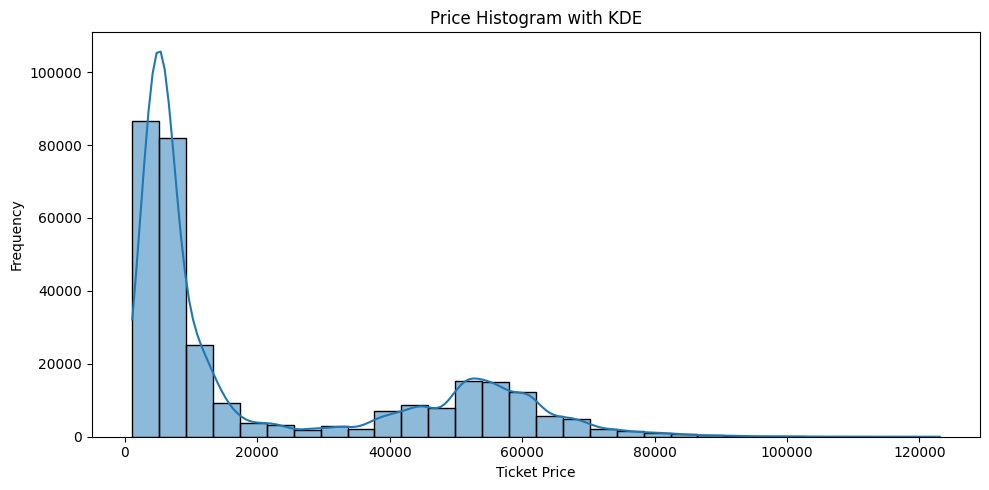

,Category,Value,Average Price
0,airline,AirAsia,4091.07
1,airline,Air_India,23507.02
2,airline,GO_FIRST,5652.01
3,airline,Indigo,5324.22
4,airline,SpiceJet,6179.28
5,airline,Vistara,30396.54
6,class,Business,52540.08
7,class,Economy,6572.34
8,source_city,Bangalore,21469.46
9,source_city,Chennai,21995.34


In [80]:
result_df = price_violin_hist(df)
result_df


In [81]:
df.sample()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
241932,Vistara,UK-986,Mumbai,Night,one,Morning,Chennai,Business,11.17,8,64509


#### any correlation between daysleft and price?

In [82]:


def analysis_days_left(df):


    corr = df["days_left"].corr(df["price"])
    print(" Correlation between days_left and price:", corr)
    print()

    if corr < 0:
        print("if  days left is decrease -> price is increase")
    elif corr > 0:
        print("if  days left is increase -> price is decrease")
    else:
        print(" No correlation ")
    print()


    plt.figure(figsize=(10,5))
    line_data = df.groupby("days_left")["price"].mean().reset_index()
    sns.lineplot(x="days_left", y="price", data=line_data)
    plt.title("Average Price per Days Left")
    plt.xlabel("Days Left")
    plt.ylabel("Average Price")
    plt.show()


 Correlation between days_left and price: -0.09194853217143847

if  days left is decrease -> price is increase



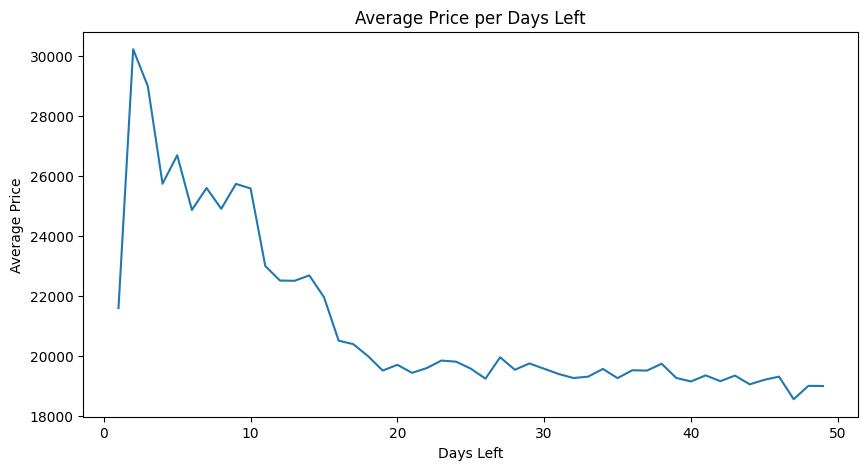

In [83]:
analysis_days_left(df)

In [86]:
df.groupby(["departure_time","stops"]).sum()[["price"]]

price
departure_time stops                  
Afternoon      one           784368805
               two_or_more    41042049
               zero           43445990
Early_Morning  one          1228628472
               two_or_more    59229229
               zero           72699797
Evening        one          1255318620
               two_or_more    35046678
               zero           91903926
Late_Night     one             9909185
               two_or_more      225787
               zero            2004689
Morning        one          1423920150
               two_or_more    46892273
               zero           68129646
Night          one          1042866445
               two_or_more     5075291
               zero           59387243

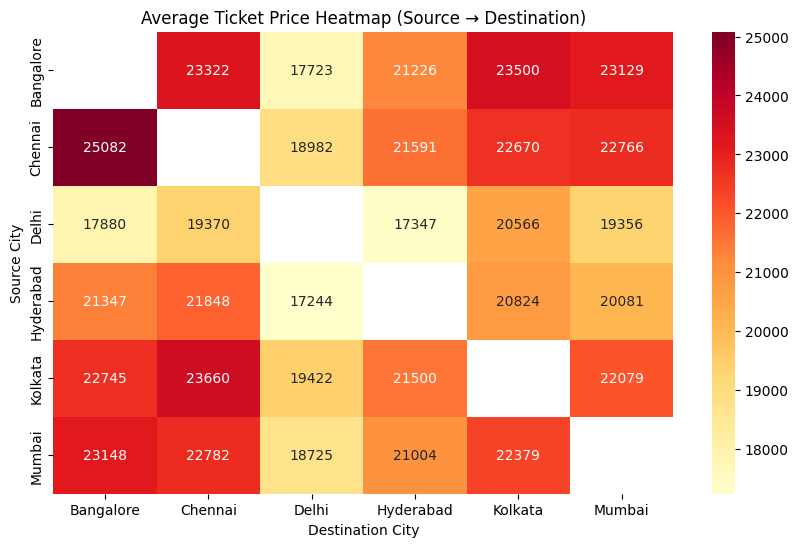

In [89]:
#  Pivot Table: average price for (Source → Destination)
pivot_avg_price = pd.pivot_table(
    df,
    values="price",
    index="source_city",
    columns="destination_city",
    aggfunc="mean"
)



# average price on heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_avg_price, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Average Ticket Price Heatmap (Source → Destination)")
plt.xlabel("Destination City")
plt.ylabel("Source City")
plt.show()


In [90]:
df.to_csv('cleaned_df.csv')

#Final Business Conclusion


🔹 Key Insights

Revenue is driven by Business Class, Peak Times, and Premium Routes.

Brand strength strongly influences price acceptance.

Customers trade off price vs convenience (time & stops).

🔹 Revenue Growth Strategy

Implement dynamic pricing models.

Upsell Economy passengers to Business.

Focus on high-margin segments instead of increasing volume.

Monetize peak demand and premium convenience

#Final Project Statement

Python was used to perform advanced exploratory data analysis, uncover pricing patterns, and support data-driven revenue optimization strategies prior to building interactive Power BI dashboards.

# Thank You for Reading